###  538 Riddler, Can you win a spelling bee if you know 99% of the words.  As seen: https://fivethirtyeight.com/features/can-you-win-a-spelling-bee-if-you-know-99-percent-of-the-words/

Rather than calculating probabilities, We're simulating through 1,000 games to get the win percentage.

In [211]:
import random
import pandas as pd
import datetime as dt

##### First let's create a table where we'll store the spelling bee contestant, the percentage of words they know, and if they are still in the game.

In [51]:
def initilialize_spelling_bee():
    contestant_table = pd.DataFrame([['me', 99, True],
                                 ['player_2', 98, True],
                                 ['player_3', 97, True],
                                 ['player_4', 96, True],
                                 ['player_5', 95, True],
                                 ['player_6', 94, True],
                                 ['player_7', 93, True],
                                 ['player_8', 92, True],
                                 ['player_9', 91, True],
                                 ['player_10', 90, True]],
                                 columns=['player', 
                                          'known_words_percent',
                                          'still_in'])
    return(contestant_table)

print(initilialize_spelling_bee())

      player  known_words_percent  still_in
0         me                   99      True
1   player_2                   98      True
2   player_3                   97      True
3   player_4                   96      True
4   player_5                   95      True
5   player_6                   94      True
6   player_7                   93      True
7   player_8                   92      True
8   player_9                   91      True
9  player_10                   90      True


##### Next, we'll create a function that will determine if a contestant knows a word. We'll provide function the contestant table, and the index of the player whose turn it is.  If the contestant doesn't know the word, we'll mark them out of the game in the table.  

In [202]:
def did_contestant_spell(contestant_table, index):
    spelled_it = False
    probability_spelled_it = contestant_table.loc[index, 'known_words_percent']
    if random.randint(1,100) <= probability_spelled_it:
        spelled_it = True
    if spelled_it is False:
        contestant_table.loc[index, 'still_in'] = False
    return(contestant_table)

##### Now we'll make a function to check for a winner.  It will look at the whole table and determine if there is only one player left.  If so, we'll end the game, and return the winner.

In [203]:
def is_game_over(contestant_table):
    players_left = contestant_table[contestant_table['still_in'] == True]
    if len(players_left) == 1:
        is_over = True
        player_left = players_left['player'].iloc[0]
    else:
        is_over = False
        player_left = None

    return(is_over, player_left)
    
              

##### Next, make a function to simulate one spelling bee that uses all the above functions.  It returns the winner of the bee, and for giggles, the number of rounds it took to win.

In [208]:
def simulate_one_bee():
    contestant_table = initilialize_spelling_bee()
    Rounds = 0
    Game_Over = False
    while Game_Over is False:
        Rounds +=1
        for turn in range(len(contestant_table)):
            did_contestant_spell(contestant_table, turn)
            Game_Over, winner  = is_game_over(contestant_table)
            if Game_Over is True:
                break
    return(Rounds, winner)
                

test_bee = simulate_one_bee()
print("'{}' won the bee in {} rounds".format(test_bee[1],test_bee[0]))

'me' won the bee in 35 rounds


##### To simulate multiple games, we'll need to keep a running tally of the wins by each player.  We'll create a function to make a table with each player and a 'win count' of zero.  

In [209]:
def initialize_bee_wins_tally():
    contestant_table = initilialize_spelling_bee()
    bee_wins_tally = contestant_table[['player', 
                                       'known_words_percent']]
    bee_wins_tally['win_count'] = 0
    return(bee_wins_tally)

print(initialize_bee_wins_tally())

      player  known_words_percent  win_count
0         me                   99          0
1   player_2                   98          0
2   player_3                   97          0
3   player_4                   96          0
4   player_5                   95          0
5   player_6                   94          0
6   player_7                   93          0
7   player_8                   92          0
8   player_9                   91          0
9  player_10                   90          0


### Now, we can simulate multiple games.  We'll initalize a win tally table.  Then we'll run through 1,000 games, whilst counting the winner and the number of rounds to win.

my win percentage is: 50.2%


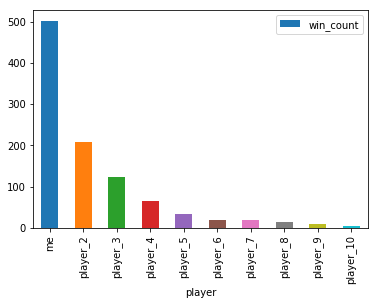

In [219]:
round_list = []
total_games_to_sim = 1000
bee_wins_tally = initialize_bee_wins_tally()
for bee in range(total_games_to_sim):
    round_count, winner = simulate_one_bee()
    bee_wins_tally.loc[bee_wins_tally['player'] == winner, 'win_count'] += 1
    round_list.append(round_count)
my_wins = bee_wins_tally.loc[bee_wins_tally['player'] == 'me', 'win_count'].sum()

print('my win percentage is: {}%'.format(my_wins / total_games_to_sim * 100))
bee_wins_tally.plot(kind='bar',x='player', y='win_count')

##### We'll also count the number of rounds... because it's fun.  The distribution of rounds looks like this. 

average number of rounds: 53.761
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281FE6FE588>]]


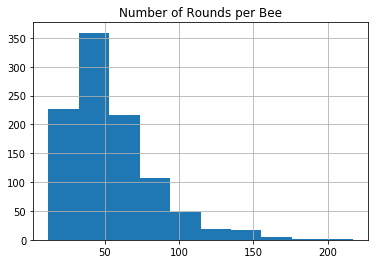

In [220]:
total_rounds =pd.DataFrame(round_list, columns=['Number of Rounds per Bee'])
print('average number of rounds: {}'
      .format(total_rounds['Number of Rounds per Bee'].mean()))
print(total_rounds.hist())

### We also want to see if going last will affect the outcome.  For this, we'll make a new one-game-simulation function, that puts the players in an increasing order of word-percentage-knowledge.  

In [185]:
def simulate_one_increasing_order_bee():
    contestant_table = initilialize_spelling_bee()
    Rounds = 0
    Game_Over = False
    while Game_Over is False:
        Rounds +=1
        order = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
        for turn in order:
            did_contestant_spell(contestant_table, turn)
            Game_Over, winner  = is_game_over(contestant_table)
            if Game_Over is True:
                break
    return(Rounds, winner)

##### Now we simulate 1,000 games again to see if we get a different answer. 

my win percentage is: 51.9%


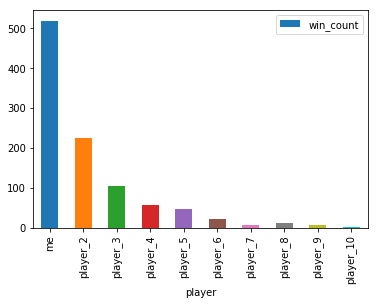

In [222]:
round_list = []
total_games_to_sim = 1000
bee_wins_tally = initialize_bee_wins_tally()
for bee in range(0, total_games_to_sim):
    round_count, winner = simulate_one_increasing_order_bee()
    bee_wins_tally.loc[bee_wins_tally['player'] == winner, 'win_count'] += 1
    round_list.append(round_count)
my_wins = bee_wins_tally.loc[bee_wins_tally['player'] == 'me', 'win_count'].sum()
print('my win percentage is: {}%'.format(my_wins / total_games_to_sim * 100))
bee_wins_tally.plot(kind='bar',x='player', y='win_count')

##### Let's see if the average numer of rounds change.  Now the bees are taking 56 rounds, it might be a wash if we simulated more games.

average number of rounds: 56.046
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281FE7C0668>]]


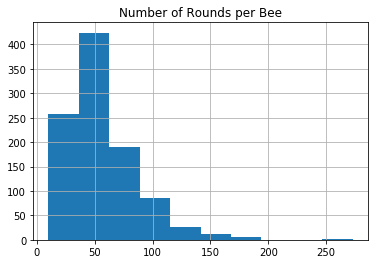

In [223]:
total_rounds =pd.DataFrame(round_list, columns=['Number of Rounds per Bee'])
print('average number of rounds: {}'
      .format(total_rounds['Number of Rounds per Bee'].mean()))
print(total_rounds.hist())